In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
from scipy.io import loadmat
import mat73
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
#load data

mat_data = loadmat('./matlab/sparse_cord3.mat')
mat_images = mat73.loadmat('./matlab/sparse_img3.mat')


[[[  0.   0.   0. ...   0.   0. 239.]
  [  0.   1.   1. ...   1.   0.   0.]
  [  0. 241. 241. ... 241.   1.   0.]
  ...
  [  0. 240. 240. ... 240.   1.   0.]
  [  0. 240. 240. ... 240.   1.   0.]
  [  0.   1.   1. ...   1.   0.   0.]]

 [[  0.   0.   0. ...   0.   0. 239.]
  [  0.   1.   1. ...   1.   0.   0.]
  [  0. 241. 241. ... 241.   1.   0.]
  ...
  [  0. 240. 240. ... 240.   1.   0.]
  [  0. 240. 240. ... 240.   1.   0.]
  [  0.   1.   1. ...   1.   0.   0.]]

 [[  0.   0.   0. ...   0.   0. 239.]
  [  0.   1.   1. ...   1.   0.   0.]
  [  0. 241. 241. ... 241.   1.   0.]
  ...
  [  0. 240. 240. ... 240.   1.   0.]
  [  0. 240. 240. ... 240.   1.   0.]
  [  0.   1.   1. ...   1.   0.   0.]]

 ...

 [[  0.   0.   0. ...   0.   0. 239.]
  [  0.   1.   1. ...   1.   0.   0.]
  [  0. 241. 241. ... 241.   1.   0.]
  ...
  [  0. 240. 240. ... 240.   1.   0.]
  [  0. 240. 240. ... 240.   1.   0.]
  [  0.   1.   1. ...   1.   0.   0.]]

 [[  0.   0.   0. ...   0.   0. 239.]
  [  0.   1.

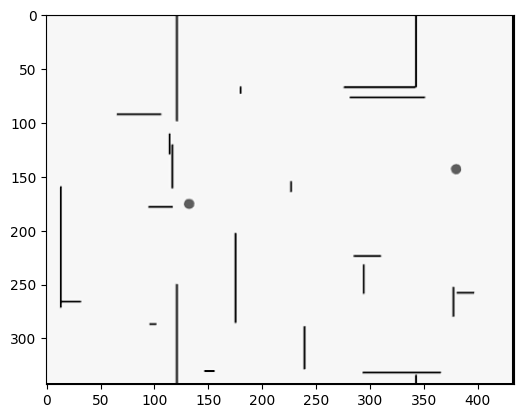

-71.50550297217679


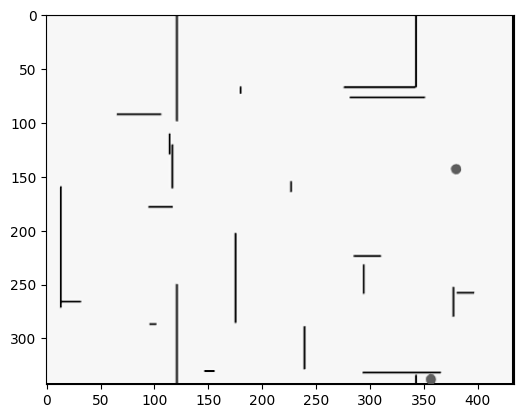

-71.31996158210582


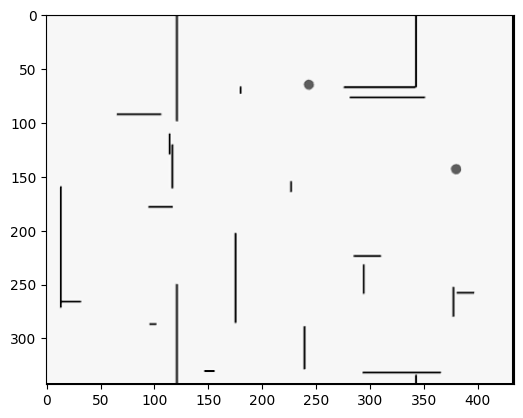

-59.21192832770413


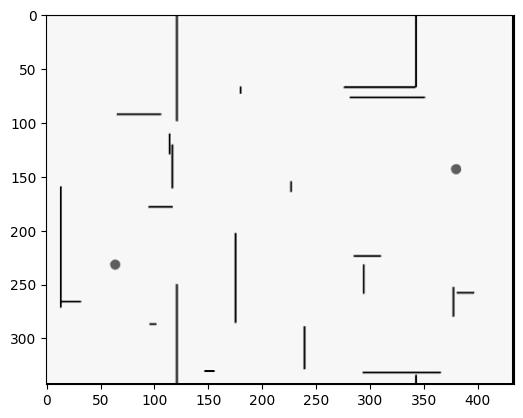

-69.65676202944921


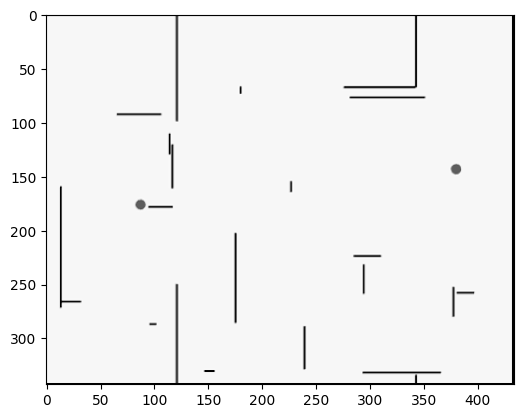

-73.9955515011361
tensor([[[ 4.4671e-02,  1.3864e-01,  1.8296e-01,  ..., -1.0128e-02,
           1.0998e-01,  7.7265e-01],
         [ 2.3626e-01, -3.6585e-02,  7.1512e-02,  ..., -5.2752e-03,
           7.9343e-02, -8.2778e-02],
         [-2.4370e-02,  8.8151e-01,  7.9389e-01,  ...,  9.8917e-01,
           1.5916e-01, -1.0034e-01],
         ...,
         [-2.6882e-02,  1.0857e+00,  9.7592e-01,  ...,  1.0068e+00,
          -1.7764e-01,  4.9652e-02],
         [-1.0849e-01,  9.8309e-01,  9.9319e-01,  ...,  8.4900e-01,
           1.0816e-01, -4.5834e-02],
         [-5.0240e-03, -5.2717e-02,  4.7296e-02,  ...,  9.1343e-02,
           1.6988e-02, -9.1851e-02]],

        [[ 7.5575e-02, -2.5417e-01, -1.7494e-01,  ..., -2.1893e-01,
           4.4924e-02,  9.9990e-01],
         [-1.1695e-01, -5.4138e-02,  2.2177e-02,  ...,  2.0329e-02,
          -3.1965e-02, -3.2059e-02],
         [-5.1119e-02,  9.9295e-01,  8.7927e-01,  ...,  9.8156e-01,
           7.9289e-02, -1.2191e-01],
         ...,
       

In [3]:
images = mat_images['final_img']
data = mat_data['final_cords']
labels=[]
print((images))

for i in data:
    labels.append(i[4])
print(np.mean(labels))
for i in range(5):
    plt.imshow(images[i,:,:], cmap='Greys_r')
    plt.show()
    print(labels[i])

images=images.astype("float")/255.0

images = torch.tensor(images)
images=images.float()
labels = torch.tensor(labels)
labels = labels.float()

#add noise
noise=torch.empty(images.size())
noise.normal_(0, 0.1)

images=images+noise
print(images)

print(images.size())
# print(images)
# print(labels)

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, images, data):
        self.features = images
        self.labels = data

    def __len__(self):
        # print(len(self.features))
        return(len(self.features))
    
    def __getitem__(self, i):
        return{'features': self.features[i], 'labels': self.labels[i]}

train_data = CustomDataset(images, labels)
print(train_data)
# trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)

#split the dataset
testloader1, testloader2 = torch.utils.data.random_split(train_data, [0.8, 0.2])

#preparte strain and data loader
testloader1 = torch.utils.data.DataLoader(testloader1, batch_size=32, shuffle=True)
testloader2 = torch.utils.data.DataLoader(testloader2, batch_size=32, shuffle=True)

print(len(testloader1))
print(len(testloader2))
# print(len(trainloader))

In [4]:
for data in testloader1:
            features, labels = data['features'], data['labels']
            print(features.size())
            print(labels)
            break


torch.Size([32, 343, 434])
tensor([-64.1374, -59.0205, -67.0905, -59.1641, -85.2012, -37.7892, -76.3229,
        -59.6119, -56.2155, -81.4431, -59.2862, -48.9102, -60.6918, -65.7934,
        -69.1815, -79.8677, -73.2374, -71.6038, -86.0730, -58.0430, -67.8861,
        -64.5365, -53.1998, -75.5645, -60.2000, -62.6498, -71.6615, -95.6921,
        -77.8328, -61.1273, -62.1700, -59.6668])


In [5]:
#CNN architecture

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(3,3))
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=(2,2), stride=2)

        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3,3))
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=(2,2), stride=2)

        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3))
        self.pool3 = nn.MaxPool2d(kernel_size=(2, 2), stride=2)
        self.relu3 = nn.ReLU()

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(272896, 256)

        self.relu4 = nn.ReLU()

        self.fc2 = nn.Linear(256, 64)
        self.relu5 = nn.ReLU()

        self.fc3 = nn.Linear(64, 1)
        self.relu6 = nn.ReLU()

        self.fc4 = nn.Linear(64, 16)
        self.relu7 = nn.ReLU()

        self.fc5= nn.Linear(16, 2)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))

        x = self.flatten(x)

        x = self.relu4(self.fc1(x))
    
        x = (self.fc2(x))
        x = (self.fc3(x))
        # x = self.fc4(x)
        # x = self.fc5(x)

        return(x)
    

net = CNN().to(DEVICE)
print(net)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu3): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=272896, out_features=256, bias=True)
  (relu4): ReLU()
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (relu5): ReLU()
  (fc3): Linear(in_features=64, out_features=1, bias=True)
  (relu6): ReLU()
  (fc4): Linear(in_features=64, out_features=16, bias=True)
  (relu7): ReLU()
  (fc5): Linear(in_features=16, out_features=2, bias=True)
)


In [6]:
#hyperparameters
lr = 3e-4
batch_size = 32
epochs = 1000


In [7]:
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=lr)

In [8]:
num_ep=[]
MAE_train = []
MAE_test = []
run_loss=[]

In [9]:
for epoch in range(epochs):

    MAE_tr=0
    MAE_te=0
    i=0
    w_tr, w_te=0,0
    running_loss = 0.0
    for data in testloader1:
        if(i>=0):
            features, labels = data['features'].unsqueeze(1).to(DEVICE), data['labels'].unsqueeze(1).to(DEVICE)
            optimizer.zero_grad()
            output = net(features)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            predicted = output.data
            diff = torch.abs(predicted-labels)
            MAE_tr+=diff.sum().item()
          


    PATH = './CNN.pth'
    torch.save(net.state_dict(), PATH)
    for data in testloader2:
        if(i>=0):
            with torch.no_grad():    
                features, labels = data['features'].unsqueeze(1).to(DEVICE), data['labels'].unsqueeze(1).to(DEVICE)
                predicted = net(features).data
                diff = torch.abs(predicted-labels)
                
                MAE_te+=diff.sum().item()
               

    
    #statistics
    MAE_tr /= (4950*0.8)
    MAE_te /= (4950*0.2)
    MAE_test.append(MAE_te)
    MAE_train.append(MAE_tr)
    num_ep.append(epoch)
    run_loss.append(running_loss/(4950*0.8))
    print(f'[{epoch + 1}, {i+1:5d}] loss: {running_loss/(4950*0.8): .3f}')
    running_loss=0.0
    print(MAE_tr)
    print(MAE_te)
    


[1,     1] loss:  10.675
13.311732602360273
10.37310263893821
[2,     1] loss:  5.599
10.433751173693725
10.19692216352983
[3,     1] loss:  5.635
10.470687669696229
10.185850740683199
[4,     1] loss:  5.649
10.48081231165414
10.407791723386206
[5,     1] loss:  5.739
10.581716714724145
11.385893480705493
[6,     1] loss:  5.622
10.459471958815449
10.188149716155698
[7,     1] loss:  5.634
10.439261446095477
10.353871231849748
[8,     1] loss:  5.394
10.190807758678089
9.791218798088305
[9,     1] loss:  4.794
9.457117882160226
8.956037532921993
[10,     1] loss:  4.502
9.085856720895478
9.074114527846827
[11,     1] loss:  4.454
9.116844527889985
10.058116242379853
[12,     1] loss:  4.631
9.25646771132344
9.20879266912287
[13,     1] loss:  4.371
8.953880668408942
11.958213328351878
[14,     1] loss:  4.401
8.9903491588554
9.281768860479797
[15,     1] loss:  4.608
9.274545137809985
8.96071224019985
[16,     1] loss:  4.308
8.871385084980666
9.107123033928149
[17,     1] loss:  4.21

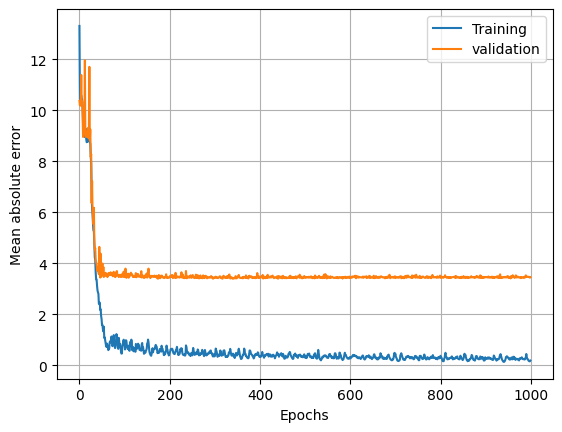

In [10]:
plt.plot(num_ep, MAE_train, label='Training')
plt.plot(num_ep, MAE_test, label='validation')
plt.xlabel("Epochs")
plt.ylabel("Mean absolute error")
plt.grid()
plt.legend(loc = 'upper right')
plt.show()


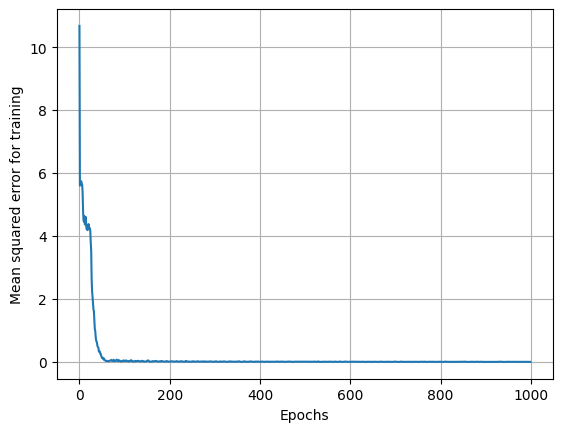

In [11]:
plt.plot(num_ep, run_loss)
plt.xlabel("Epochs")
plt.ylabel("Mean squared error for training")
plt.grid()
plt.show()

In [12]:
print(min(MAE_test))
print(min(MAE_train))

3.391241085168087
0.13094544073547978
